In [1]:
# 载入必要的库
import numpy as np
import tensorflow as tf
import keras

from matplotlib import pyplot as plt

from keras import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.layers import Flatten, Dropout, Dense, Input, concatenate
from tensorflow.keras.applications import VGG16

Using TensorFlow backend.


## 读取数据 

###  构建数据生成器

In [2]:
IMSIZE=224

train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.5,
    rotation_range=30,
    zoom_range=0.2, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True).flow_from_directory(
    './CatDog/train/',
    target_size=(IMSIZE, IMSIZE),
    batch_size=200,
    class_mode='categorical')

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './CatDog/validation/',
    target_size=(IMSIZE, IMSIZE),
    batch_size=200,
    class_mode='categorical')

Found 15000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


###  可视化

<Figure size 432x288 with 0 Axes>

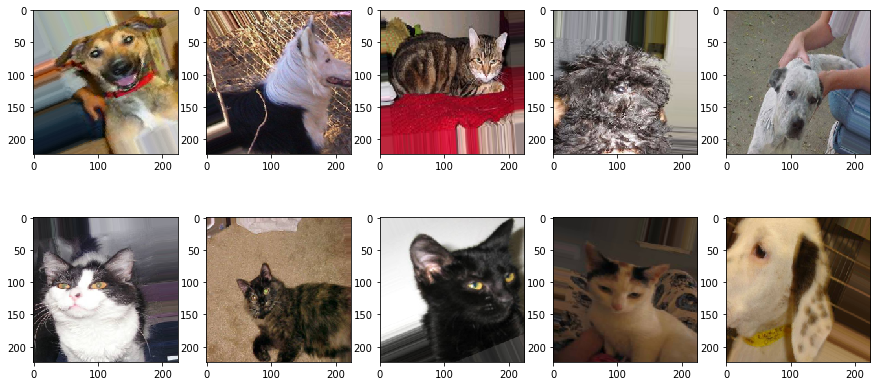

In [3]:
plt.figure()
fig,ax = plt.subplots(2,5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax=ax.flatten()
X,Y=next(train_generator)
for i in range(10): ax[i].imshow(X[i,:,:,:])

## 构建深度模型 

### 模型建立 

In [4]:
IMSIZE=224
n_channel=20
input_layer=Input([IMSIZE,IMSIZE,3])
x=input_layer
x=BatchNormalization()(x)
for _ in range(7):
    x=Conv2D(n_channel,[2,2],padding='same',activation='relu')(x)
    x=MaxPooling2D([2,2])(x)
x=Flatten()(x)
x=Dense(2,activation='softmax')(x)
output_layer=x
model=Model(input_layer,output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 20)      260       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 20)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 20)      1620      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 20)        1620

### 模型编译及拟合 

In [5]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
 
model.fit(train_generator,epochs=5,validation_data=validation_generator)

Epoch 1/5
75/75 [==============================] - 319s 4s/step - loss: 0.6731 - accuracy: 0.5732 - val_loss: 0.6748 - val_accuracy: 0.5703
Epoch 2/5
75/75 [==============================] - 284s 4s/step - loss: 0.6372 - accuracy: 0.6318 - val_loss: 0.6556 - val_accuracy: 0.5972
Epoch 3/5
75/75 [==============================] - 288s 4s/step - loss: 0.6200 - accuracy: 0.6567 - val_loss: 0.6126 - val_accuracy: 0.6835
Epoch 4/5
75/75 [==============================] - 289s 4s/step - loss: 0.6055 - accuracy: 0.6725 - val_loss: 0.6018 - val_accuracy: 0.6634
Epoch 5/5
75/75 [==============================] - 291s 4s/step - loss: 0.5886 - accuracy: 0.6854 - val_loss: 0.5875 - val_accuracy: 0.7178


### 思考：构建属于你自己的深度模型和宽度模型，并运用BN和DA的技巧，看看你能把猫狗分类的精度做到多少？